<h1 align="center"> Computation for Physicists </h1>
<h2 align="center"> <em>Integration and Differentiation</em> </h2>
<h2 align="center" > <a href="mailto:duan@unm.edu">Dr. Duan</a> (UNM) </h2>

# Homework 11

- Define a function or class that produces a degree-$(n-1)$ polynomial interpolant for any given $n$ data points $(t_i, y_i)$. 

- Interpolate Runge's function $f(t)=1/(1+25 t^2)$ with both the polynomial interpolant you implemented and a cubic spline on $[-1,1]$ with increasing number of equally-spaced points and compare the results.

## Lagrange Interpolation

- The _Lagrange basis functions_ are defined by 
$$ \ell_i(t) = \prod_{j\neq i}\frac{(t-t_j)}{(t_i-t_j)}. $$

- $\ell_i(t)$ are polynomials of degree $n-1$.

- $\ell_i(t_j)=\delta_{i j}$. Therefore,
$$ p_{n-1}(t) = \sum_i y_i \ell_i(t). $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BarycentricInterpolator
from homework import hw11

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg') # make sharp images

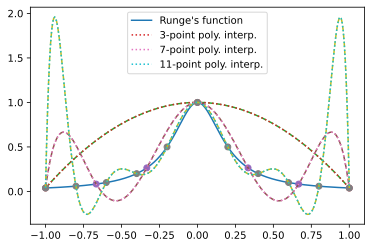

In [2]:
f = lambda t: 1/(1+25* t**2) # Runge's function
n = [3, 7, 11] # number of points

tt = np.linspace(-1, 1, 300)
plt.plot(tt, f(tt), label="Runge's function")
for ni in n:
    t = np.linspace(-1, 1, ni) # abscissas for interpolation
    y = f(t) # ordinates
    plt.plot(t, y, 'o')
    p1 = BarycentricInterpolator(t, f(t)) # scipy version
    p2 = hw11.LagrangeInterpolant(t, f(t)) # homework version
    plt.plot(tt, p1(tt), '--')
    plt.plot(tt, p2(tt), ':', label=f'{ni}-point poly. interp.')
plt.legend()
plt.show()

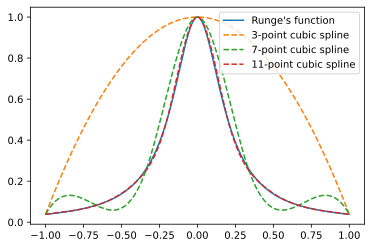

In [3]:
from scipy.interpolate import CubicSpline

plt.plot(tt, f(tt), label="Runge's function")
for i, ni in enumerate(n):
    t = np.linspace(-1, 1, ni) # abscissas for interpolation
    spl = CubicSpline(t, f(t))
    plt.plot(tt, spl(tt), '--', label=f'{ni}-point cubic spline')

plt.legend()
plt.show()

# Numerical Differentiation

- Numerical differentiation is sensitive to the perturbations in data.

- Even if the data are accurate, the differentiation can still be uncertain unless the underlying function is smooth.

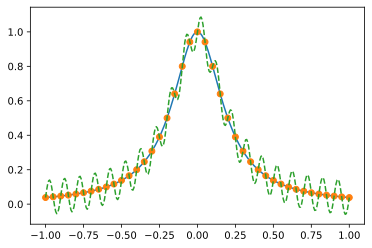

In [4]:
plt.plot(tt, f(tt))
tx = np.linspace(-1, 1, 41)
plt.plot(tx, f(tx), 'o')
plt.plot(tt, f(tt)+0.1*np.sin(20*np.pi*tt), '--')
plt.show()

## Finite Difference

- Consider the Taylor series of a smooth function $f(x)$:
$$
f(x\pm h) = f(x) \pm h f'(x) + \frac{h^2}{2} f''(x) \pm \frac{h^3}{6} f''' + \cdots
$$

- The _forward difference approximation_ gives
    $$
    f'(x) = \frac{f(x+h) -f(x)}{h} + \mathcal{O}(h).
    $$

- The _backward difference approximation_ gives
    $$
    f'(x) = \frac{f(x) -f(x-h)}{h} + \mathcal{O}(h).
    $$

- The combination of the forward and back difference gives the _central difference approximation_ 
    $$
    f'(x) = \frac{f(x+h) -f(x-h)}{2h} + \mathcal{O}(h^2)
    $$
    and
    $$
    f''(x) = \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} + \mathcal{O}(h^2).
    $$
    
- [`scipy.misc.derivative`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html) uses the central difference approximation to compute the derivatives of a given function.

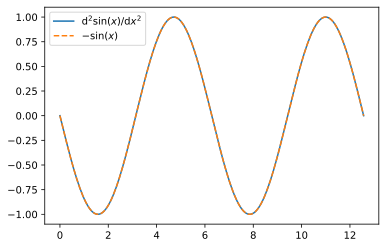

In [5]:
from scipy.misc import derivative

tt = np.linspace(0, 4*np.pi, 200)
plt.plot(tt, derivative(np.sin, tt, dx=1e-6, n=2), 
         label='$\mathrm{d}^2\sin(x)/\mathrm{d}x^2$')
plt.plot(tt, -np.sin(tt), '--', label='$-\sin(x)$')
plt.legend()
plt.show()

# Numerical Quadrature

- A _quadrature rule_ 
$$ Q_n(f) = \sum_i w_i f(x_i) $$
approximates the integral of function $f(x)$ on interval $[a, b]$ by the sum of $f(x_i)$ at _nodes_ or _abscissas_ $x_i$ ($i=0,1,\ldots, n-1$) with weights $w_i$.

- A quadrature rule is _closed_ (_open_) if the endpoints are (not) included in the abscissas.

- Numerical integration is well-conditioned because of the smoothing effect.

- Quadrature rules are based on polynomial interpolation. For example, 
$$ w_i = \int_a^b \ell_i(x)\,\mathrm{d} x $$
for Lagrange interpolation. Generally speaking, the interpolating polynomial does not need to be calculated explicitly in practice.

- A quadrature rule of _degree_ $d$ is exact for polynomials of degree $d$ and below, but not exact for some polynomials of degree $d+1$.

- The absolute condition number of a quadrature rule is $\sum_i |w_i|$. A quadrature rule is stable if all of its weights are non-negative.

- [`scipy.integrate`](https://docs.scipy.org/doc/scipy/reference/integrate.html) provides various numerical quadratures.

## Newton-Cotes Quadrature

- _Newton-Cotes quadrature rules_ use equally spaced nodes in $[a, b]$. Using the Taylor series, one can approximate $I(f) = \int_a^b f(x)\,\mathrm{d} x$ with
    - the _midpoint rule_ 
    $$ I(f)=(b - a)f\left(\frac{a+b}{2}\right) + \frac{(b-a)^3}{24}f''\left(\frac{a+b}{2}\right) + \cdots, $$
    - the _trapezoid rule_
    $$ I(f) =  (b-a)\left(\frac{f(a)+f(b)}{2}\right) - \frac{(b-a)^3}{12}f''\left(\frac{a+b}{2}\right) + \cdots,$$
    - and the _Simpson's rule_
    $$ I(f) = \left[S(f) = \frac{2M(f)+T(f)}{3}\right] + \mathcal{O}((b-a)^5).$$

- The weights of the $n$-point rule on an interval with given nodes $x_i$ ($i=0,1,\ldots,n-1$) can be computed by requiring that it gives the exact results for the integrals of the monomials $x^k$ ($k=0,1,\ldots,n-1$):
$$
Q_n(x^k) = \sum_{i=0}^{n-1} w_i x_i^k = \int_a^b x^k\,\mathrm{d}x= \frac{b^{k+1}-a^{k+1}}{k+1}
$$
or
$$
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_0 & x_1 & \cdots & x_{n-1} \\
\vdots & \vdots & \ddots & \vdots \\
x_0^{n-1} & x_1^{n-1} & \cdots & x_{n-1}^{n-1}
\end{bmatrix} \begin{bmatrix}
w_0 \\ w_1 \\ \vdots \\ w_{n-1}
\end{bmatrix}
= \begin{bmatrix}
b-a \\ (b^2-a^2)/2 \\ \vdots \\ (b^n-a^n)/n
\end{bmatrix}.
$$

- Newton-Cotes quadrature rules with large number of nodes have negative weights and are not well-conditioned.

## Gaussian Quadrature

- [_Gaussian quadrature rules_](https://en.wikipedia.org/wiki/Gaussian_quadrature) are also based on polynomial interpolation, but both the nodes $x_i$ and the weights $w_i$ are chosen to maximize the degree of the rule.

- The $n$-point _Gauss-Legendre quadrature_ rule is exact for the integration of polynomials up to degree $2n-1$ on interval $[-1, 1]$, where the nodes are the roots of the Legendre polynomial $L_n(x)$.

- The Gaussian quadrature rules for the integral $\int_{-1}^1 \omega(x)f(x)\,\mathrm{d}x$ with the non-negative weight function $\omega(x)$ can be derived using the orthogonal polynomials associated with $\omega(x)$.

- A change of variable can be used to transform an arbitrary interval $[a, b]$ to $[-1, 1]$.


In [6]:
from scipy.integrate import fixed_quad, quadrature

f = lambda x: x**7
for k in range(1, 5):
    print(f'fixed_quad ({k}-point) : ', fixed_quad(f, 0, 1, n=k))
print('quadrature : ', quadrature(f, 0, 1))

fixed_quad (1-point) :  (0.0078125, None)
fixed_quad (2-point) :  (0.09490740740740738, None)
fixed_quad (3-point) :  (0.12375000000000004, None)
fixed_quad (4-point) :  (0.12499999999999993, None)
quadrature :  (0.1249999999999999, 2.7755575615628914e-17)


## Composite Quadrature

- _Composite quadrature_ rules are based on piecewise interpolation and apply simple quadrature rules to subintervals. Dividing $[a,b]$ into $k$ subintervals $x_j=a+j h$ each of step size $h=(b-a)/k$, one has
    - _composite midpoint rule_:
    $$ M_k(f) = h\sum_{j=0}^{k-1} f\left(\frac{x_j + x_{j+1}}{2}\right), $$
    - _composite trapezoid rule_:
    $$ T_k(f) = h\left[\frac{f(a)}{2} + f(x_1) + \cdots + f(x_{k-1}) + \frac{f(b)}{2}\right]. $$
    
- The errors of the composite midpoint or trapzoid rules are both of $\mathcal{O}(h^2)$. The error of a composite quadrature can be reduced decreasing $h$ or increasing $k$.

- An error estimate can be obtained by the difference of the results a pair of quadrature rules, e.g. with subinterval size $h$ and $h/2$. One can keep subdividing the intervals until the desired accuracy is achieved.

- More intelligent approach is _adaptive quadrature_ by selectively refining the subintervals to reflect the behavior of the integrand.

In [ ]:
from scipy.integrate import trapezoid

f = lambda t: 1/(1+25* t**2) # Runge's function
for k in range(6):
    x = np.linspace(-1, 1, 2**k+1)
    print(f'Trapezoid with {2**k} subintervals : ', trapezoid(f(x), dx=x[1]-x[0]))

## Richardson Extrapolation

- Let 
$$ A(h)=A_* + B h^p + \mathcal{O}(h^r) $$ 
be an approximation rule to $A_*$ with step size $h$, where $r>p>0$.

- Using the above expression and
$$ A(h/q) = A_* + B (h/q)^p + \mathcal{O}(h^r) $$
one obtains
$$ A_* = A(h) + \frac{A(h) - A(h/q)}{q^{-p}-1} + \mathcal{O}(h^r). $$
In essence, _Richardson extrapolation_ estimates $A_*=\lim_{h\rightarrow0} A(h)$ by extrapolating from $A(h)$ with  different values of $h$.

- Richardson extrapolation can be used in both the differentiation and integration. 

- _Romberg integration_ combines the composite trapezoid rule and Richardson extrapolation by sucessively halving step sizes.

In [7]:
from scipy.integrate import romb

f = lambda t: 1/(1+25* t**2) # Runge's function
for k in range(6):
    x = np.linspace(-1, 1, 2**k+1)
    print(f'Romberg with {2**k} subintervals : ', romb(f(x), dx=x[1]-x[0]))

Romberg with 1 subintervals :  0.07692307692307693
Romberg with 2 subintervals :  1.358974358974359
Romberg with 4 subintervals :  0.47480106100795755
Romberg with 8 subintervals :  0.523803200403014
Romberg with 16 subintervals :  0.5487064582652256
Romberg with 32 subintervals :  0.5495459859458024


In [8]:
from scipy.integrate import romberg
romberg(f, a=-1, b=1, show=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x15ef7b5e0> from [-1, 1]

 Steps  StepSize   Results
     1  2.000000  0.076923 
     2  1.000000  1.038462  1.358974 
     4  0.500000  0.657162  0.530062  0.474801 
     8  0.250000  0.556898  0.523477  0.523038  0.523803 
    16  0.125000  0.549222  0.546664  0.548210  0.548609  0.548706 
    32  0.062500  0.549312  0.549342  0.549521  0.549542  0.549545  0.549546 
    64  0.031250  0.549348  0.549360  0.549362  0.549359  0.549358  0.549358  0.549358 
   128  0.015625  0.549357  0.549360  0.549360  0.549360  0.549360  0.549360  0.549360  0.549360 
   256  0.007812  0.549360  0.549360  0.549360  0.549360  0.549360  0.549360  0.549360  0.549360  0.549360 

The final result is 0.549360306869203 after 257 function evaluations.


0.549360306869203

In [9]:
from scipy.integrate import quad

quad(f, a=-1, b=1)

(0.5493603067780066, 2.8668279350011863e-09)

- Numerical quadrature can be grossly wrong when the integrand is not well sampled.

In [10]:
f = lambda x: np.sin(x)**2 / np.pi

quad(f, a=0, b=2*np.pi)

(1.0, 7.339841164769853e-10)

In [11]:
romberg(f, a=0, b=2*np.pi, show=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x15ef7bc10> from [0, 6.283185307179586]

 Steps  StepSize   Results
     1  6.283185  0.000000 
     2  3.141593  0.000000  0.000000 

The final result is 3.9993594204316203e-32 after 3 function evaluations.


3.9993594204316203e-32

# Homework 12

- Use the following two methods to compute the integral $ \iint e^{-x y}\,\mathrm{d}x\mathrm{d}y $ with $x^2+y^2\leq 1$, $x\geq 0$, and $y\geq 0$.:
    - Use nested [`scipy.integrate.quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html),
    - Use [`scipy.integrate.dblquad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.dblquad.html).